In [4]:
%pylab inline
from scipy import integrate

Populating the interactive namespace from numpy and matplotlib


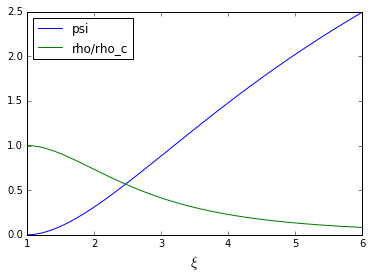

In [5]:
def solvr(Y, t):
    return [Y[1], exp(-Y[0])-2/t*Y[1]]
a_t = np.arange(1, 6.0, 0.01)
asol = integrate.odeint(solvr, [0, 0], a_t)
rho = np.exp(-asol[:,0]) #rho/rho_c
plt.plot(a_t,asol[:,0],label ='psi')#$\psi$' )
plt.plot(a_t,rho,label ='rho/rho_c')#$\rho$')
plt.xlabel(r"$\xi$",fontsize=15)
from matplotlib.legend_handler import HandlerLine2D
plt.legend(loc='upper left',prop={'size':12},numpoints=1)

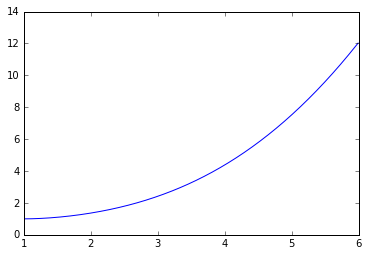

In [7]:
plt.plot(a_t,1./rho,label ='rho_c/rho')

Oops... looks like its tweleve, that would explain why its not collapsing . 

$$\frac{\rho_c}{\rho_0}>14.1$$

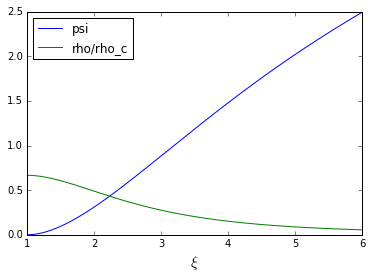

In [20]:
def solvr(Y, t):
    return [Y[1], exp(-Y[0])-2/t*Y[1]]
a_t = np.arange(1, 6.0, 0.01)
asol = integrate.odeint(solvr, [0, 0], a_t)
rho_c = 1.5
rho = np.exp(-asol[:,0]) #rho/rho_c
plt.plot(a_t,asol[:,0],label ='psi')#$\psi$' )
plt.plot(a_t,rho/rho_c,label ='rho/rho_c')#$\rho$')
plt.xlabel(r"$\xi$",fontsize=15)
from matplotlib.legend_handler import HandlerLine2D
plt.legend(loc='upper left',prop={'size':12},numpoints=1)

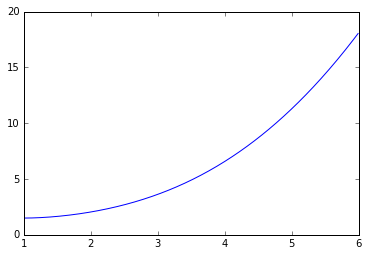

In [21]:
plt.plot(a_t,rho_c/rho,label ='rho_c/rho')

I have it slightly higher than 14.1 just so that it ensures collapse 

In [26]:
from matplotlib.legend_handler import HandlerLine2D
from scipy import integrate
from mpl_toolkits.axes_grid1 import AxesGrid
import yt
from yt.mods import *

In [35]:
cd /project/projectdirs/astro250/doris/ramses3/trunk/ramses/bin

/global/project/projectdirs/astro250/doris/ramses3/trunk/ramses/bin


# Simulation Data 

In [36]:
rho_c = 0.02806
scale_d = 3.92e-18
def compareplot1Dprofile(timestep):
    pf= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
    sp = pf.sphere(pf.domain_center, (0.32,"pc"))
    rp = yt.create_profile(sp,'radius','density')#,units={'radius':'pc'},logs={'radius':False})
    plt.plot(rp.x.value*3.24077929e-19,rp["density"].in_units("g/cm**3").value,label="Simulation")
    xi_max = 6.451
    def solvr(Y, t):
        return [Y[1], exp(-Y[0])-2/t*Y[1]]
    xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
    asol = integrate.odeint(solvr, [0, 0], xi)
    rho = np.exp(-asol[:,0]) #rho/rho_c
    r = xi/1.05e-17 #[cm]
    #1cm = 3.24077929e-19 Parsecs
    plt.plot(r*3.24077929e-19,rho*rho_c*scale_d,label ='Integration',color="red")#$\rho$')
    plt.xlabel("Physical radius [pc]",fontsize=15)
    plt.ylabel("Density[g/cm^3]",fontsize=15)
    plt.legend(loc='upper right',prop={'size':12},numpoints=1)

In [37]:
yt.funcs.mylog.setLevel(50)

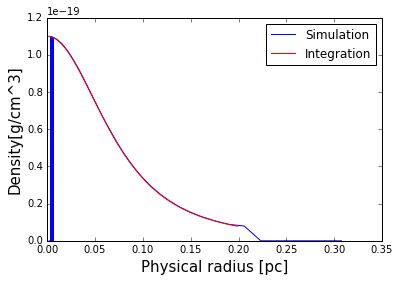

In [38]:
compareplot1Dprofile(1)

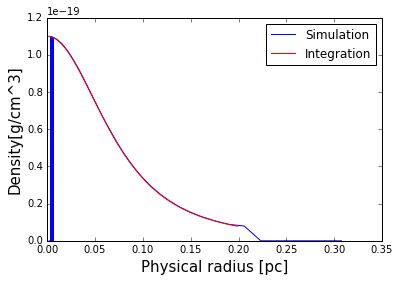

In [41]:
timestep =1
pf= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
sp = pf.sphere(pf.domain_center, (0.32,"pc"))
rp = yt.create_profile(sp,'radius','density')#,units={'radius':'pc'},logs={'radius':False})
plt.plot(rp.x.value*3.24077929e-19,rp["density"].in_units("g/cm**3").value,label="Simulation")
xi_max = 6.451
def solvr(Y, t):
    return [Y[1], exp(-Y[0])-2/t*Y[1]]
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho = np.exp(-asol[:,0]) #rho/rho_c
r = xi/1.05e-17 #[cm]
#1cm = 3.24077929e-19 Parsecs
plt.plot(r*3.24077929e-19,rho*rho_c*scale_d,label ='Integration',color="red")#$\rho$')
plt.xlabel("Physical radius [pc]",fontsize=15)
plt.ylabel("Density[g/cm^3]",fontsize=15)
plt.legend(loc='upper right',prop={'size':12},numpoints=1)

In [45]:
(r*3.24077929e-19)[-1]

0.19907647296456468

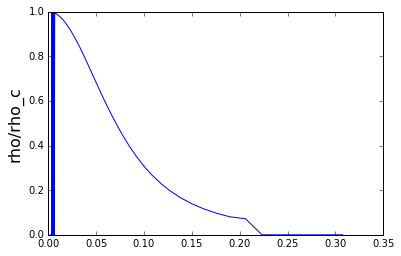

In [52]:
plt.plot(rp.x.value*3.24077929e-19,rp["density"].in_units("g/cm**3").value/rho_c/scale_d)
plt.ylabel("rho/rho_c",fontsize=16)

(0, 15)

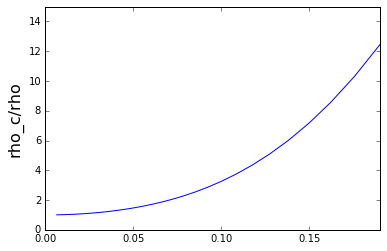

In [62]:
plt.plot(rp.x.value*3.24077929e-19,rho_c/rp["density"].in_units("g/cm**3").value*scale_d)
plt.ylabel("rho_c/rho",fontsize=16)
plt.xlim(0,0.19)
plt.ylim(0,15)

Okay this is also not < 14.2 as expected 

yay now this makes sense, so if we up the $\rho_c$ we should get the dense core to collapse! 


so what would be an appropriate value of $\rho_c$? 

(0, 20)

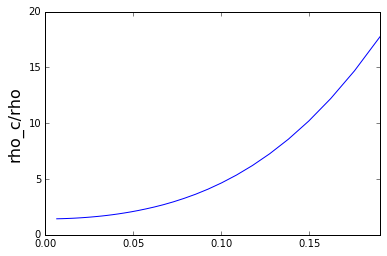

In [71]:
rho_c_new = 0.04
plt.plot(rp.x.value*3.24077929e-19,rho_c_new/rp["density"].in_units("g/cm**3").value*scale_d)
plt.ylabel("rho_c/rho",fontsize=16)
plt.xlim(0,0.19)
plt.ylim(0,20)

Let's go a bit over just to see the thing collapse legitimately, then we can use the appropriate values 14.1

Okay so since the numerical solution is fixed, we just need to change the fortran file 

Actually this is more complicated because this also changes the non dimensional radius coverison factor 

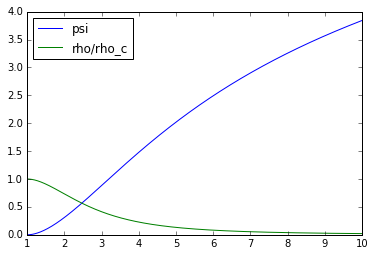

In [100]:
def solvr(Y, t):
    return [Y[1], exp(-Y[0])-2/t*Y[1]]
a_t = np.arange(1,10, 0.01)
asol = integrate.odeint(solvr, [0, 0], a_t)
rho_c = 1.
rho = np.exp(-asol[:,0]) #rho/rho_c
plt.plot(a_t,asol[:,0],label ='psi')#$\psi$' )
plt.plot(a_t,rho,label ='rho/rho_c')#$\rho$')
plt.legend(loc='upper left',prop={'size':12},numpoints=1)

In [101]:
idx = np.where(rho_c/rho>14.1)[0][0]
print  a_t[idx]

6.37


In [118]:
d_scale =  3.19e-18 #[code units]--> [physical units]
G = 6.67408e-8 #[cgs]
T = 10.
k = 1.38e-16 #boltzman's constant [cgs]
m = 1.6737236e-24 #mass of hydrogen in grams  
a_T = sqrt(k*T/m) 
print "sound speed: ", a_T, "cm/s"
xi_max = a_t[idx]
r_max = 3.08567758e17 #0.1pc in cm
rho_c_new =  (xi_max/r_max)**2*a_T**2/4.*pi*G
print "new rho_c: ", rho_c_new ,"g/cm^3"
print "new rho_c: ",  rho_c_new/d_scale,"code units "

sound speed:  28714.2629612 cm/s
new rho_c:  1.84185064563e-32 g/cm^3
new rho_c:  5.77382647531e-15 code units 


In [111]:
xi_max

6.3700000000000045

In [117]:
rho_c

1.0

### Makign a new density.txt that integrates out to $\xi=6.451$ [foster and chevalier value]

In [125]:
a_t[545]

6.4500000000000046

In [128]:
print "which yields a density contrast of ", (rho_c/rho)[545]

which yields a density contrast of  14.6235654129


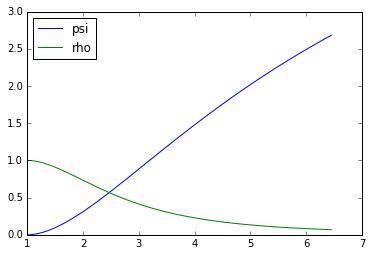

In [152]:
a_t = np.arange(1,6.451, 0.01)
asol = integrate.odeint(solvr, [0, 0], a_t)
# rho_c = 1.
rho = rho_c * np.exp(-asol[:,0]) #rho/rho_c
plt.plot(a_t,asol[:,0],label ='psi')#$\psi$' )
plt.plot(a_t,rho/rho_c,label ='rho')#$\rho$')
plt.legend(loc='upper left',prop={'size':12},numpoints=1)

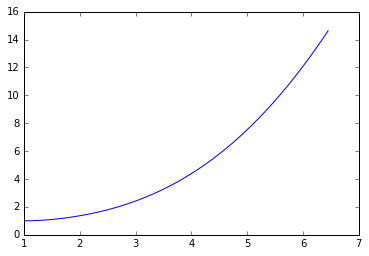

In [149]:
plt.plot(a_t,rho_c/rho,label ='rho')

In [151]:
(rho_c/rho)[-1]

14.623565412910835

In [130]:
pwd

u'/global/project/projectdirs/astro250/doris/ramses3/trunk/ramses/bin'

In [131]:
np.savetxt("../patch/hydro/isothermal_sphere/density.txt",rho)

So I kept with the same rho_c for 10^-9 and ran the simulation with this new density profile.txt to see whether the numerical setup is actually good (i.e. edge density contrast largeer than 14.1) 

Trying to debug this with no MPI first 

In [133]:
shape(rho)

(546,)

The size of the array needed to be changed 

okay resolved, properly building grid now, now move back to MPI 

In [136]:
rho_c = 0.02806
scale_d = 3.92e-18
def compareplot1Dprofile(timestep):
    pf= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
    sp = pf.sphere(pf.domain_center, (0.32,"pc"))
    rp = yt.create_profile(sp,'radius','density')#,units={'radius':'pc'},logs={'radius':False})
    plt.plot(rp.x.value*3.24077929e-19,rp["density"].in_units("g/cm**3").value,label="Simulation")
    xi_max = 6.451
    def solvr(Y, t):
        return [Y[1], exp(-Y[0])-2/t*Y[1]]
    xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
    asol = integrate.odeint(solvr, [0, 0], xi)
    rho = np.exp(-asol[:,0]) #rho/rho_c
    r = xi/1.05e-17 #[cm]
    #1cm = 3.24077929e-19 Parsecs
    plt.plot(r*3.24077929e-19,rho*rho_c*scale_d,label ='Integration',color="red")#$\rho$')
    plt.xlabel("Physical radius [pc]",fontsize=15)
    plt.ylabel("Density[g/cm^3]",fontsize=15)
    plt.legend(loc='upper right',prop={'size':12},numpoints=1)

In [141]:
cd ~/StarFormationCode/FosterChevalier_is/

/global/u2/d/dorislee/StarFormationCode/FosterChevalier_is


In [142]:
import plot_is

In [143]:
cd /project/projectdirs/astro250/doris/ramses3/trunk/ramses/bin

/global/project/projectdirs/astro250/doris/ramses3/trunk/ramses/bin


In [145]:
plot_is.plot_time_slice("density",1)

AssertionError: 

In [146]:
timestep=1
pf= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
sp = pf.sphere(pf.domain_center, (0.32,"pc"))
rp = yt.create_profile(sp,'radius','density')#,units={'radius':'pc'},logs={'radius':False})
plt.plot(rp.x.value*3.24077929e-19,rp["density"].in_units("g/cm**3").value,label="Simulation")

error: unpack requires a string argument of length 4

Okay the data output is corrupted 

woah jsut noticed that the timestep is absurdly small!  dt= 3.185-103 , this probably means that I set the density wrong or soemthign . Also there's some NaNs I think it might be because my AMR levelmin was lowere to 5 which was not good even in my previous tests 